# Exploring the interactive widgets of ipython
Learn how to play with them.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot inline
%matplotlib inline

# Add the proper path
import sys
sys.path.append("../")

# Local libraries
from signals.aux_functions import gaussian_bump, combine_gaussian_bumps
from inputs.sensors import Sensor, PerceptualSpace
from inputs.lag_structure import LagStructure

# Widgets library
from ipywidgets import interact, interactive, fixed
from IPython.display import display

In [26]:
Tmax = 1000
dt = 1.0
time = np.arange(0, Tmax, dt)

First we define the parameters for the gaussian bumpbs

In [27]:
max_rate = 100
base = 10
value = 30
attenuation = 2

center1 = 200
center2 = 500
center3 = 750

### One gaussian bump
We define a function that passes all the parameters in order to build a slider. Then we plot it.

In [28]:
def plot_gaussian_bump(mu, Max, base, value, a):
    plt.plot(time, gaussian_bump(time, mu, Max, base, value, a))
    plt.ylim([0, 120])

<function __main__.plot_gaussian_bump2>

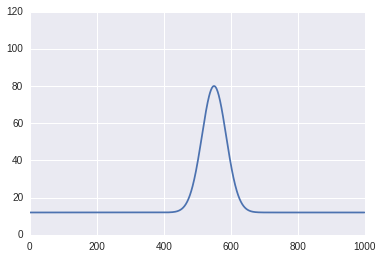

In [29]:
interact(plot_gaussian_bump2, mu=(100, 1000), Max=(60, 100), 
         base=(0, 25), value=(10, 100), a=(2.0, 3.0, 0.1))

### A train of gaussian bumps

In [32]:
def plot_gaussian_train(mu1, mu2, mu3, Max, base, value):
    # Create the gaussian bumpbs
    gb1 = gaussian_bump(time,  mu1, Max, base, value, attenuation)
    gb2 = gaussian_bump(time,  mu2, Max, base, value, attenuation)
    gb3 = gaussian_bump(time,  mu3, Max, base, value, attenuation)

    # Combine them
    aux = [gb1, gb2, gb3]  # A list of functions
    gaussian_train = combine_gaussian_bumps(aux, base)
    plt.plot(time, gaussian_train)
    plt.ylim([0, 200])

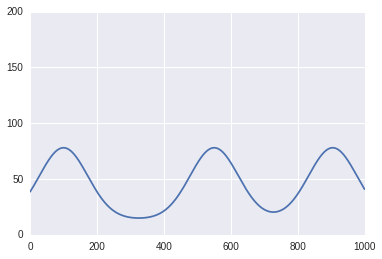

In [33]:
interact(plot_gaussian_train, mu1=(100, 1000), mu2=(100, 1000), mu3=(100, 1000), 
         Max=(60, 100), base=(0, 25), value=(10, 100))